In [19]:
import numpy as np
import random
import sympy as sy
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from datascience import *

In [2]:
#Project ease of use tools
def easyview():
    viewer = sy.Matrix([board.take(np.arange(i, i + int(np.sqrt(len(board))))).tolist() for i in range(0, int(len(board)), int(np.sqrt(len(board))))])
    return viewer

In [3]:
board = np.repeat(0,100)
carrier = 5
battleship = 4
cruiser = 3
submarine = 3
patrol_boat = 2
ships = [carrier,battleship,cruiser,submarine,patrol_boat]

In [4]:
def horizontal(shipchoice):
    while True:
        choicey = random.choice(np.arange(0, 10))
        choicex = random.choice(np.arange(1, 12 - shipchoice))
        choice = choicex + choicey * 10
        if all(0 <= choice + i < len(board) and board[choice + i] == 0 for i in range(shipchoice)):
            for i in range(shipchoice):
                board[choice + i] = 1
            return board, choice

In [5]:
def vertical(shipchoice):
    while True:
        choicey = random.choice(np.arange(0, 11 - carrier))
        choicex = random.choice(np.arange(0, 10))
        choice = choicex + choicey * 10
        if all(0 <= choice + i < len(board) and board[choice + (i*10)] == 0 for i in range(shipchoice)):
            for i in range(shipchoice):
                board[choice + (i-1)*10] = 1
            return board,choice

In [6]:
def build_board():
    ship_order = random.sample(ships, 5)
    vert_hor_order = [random.choice([0, 1]) for i in range(5)]
    for i in range(5):
        if vert_hor_order[i] == 0:
            horizontal(ship_order[i])
        else:
            vertical(ship_order[i])
    return board

In [7]:
def game_logic(pick):
    if board[pick] == 1:
        board[pick] = 2

In [24]:
#Ships Fairness Testing
ships = [carrier,battleship,cruiser,submarine,patrol_boat]
shipsTestingHorizontal = [[],[],[],[],[]]
for i in range(5):
    board = np.repeat(0,100)
    shiptest = ships[i]
    for j in range(10000):
        board = np.repeat(0,100)
        pick = horizontal(shiptest)[1]
        shipsTestingHorizontal[i] = np.append(shipsTestingHorizontal[i], pick)

shipsTestingVertical = [[],[],[],[],[]]
for i in range(5):
    board = np.repeat(0,100)
    shiptest = ships[i]
    for j in range(10000):
        board = np.repeat(0,100)
        pick = vertical(shiptest)[1]
        shipsTestingVertical[i] = np.append(shipsTestingVertical[i], pick)

In [9]:
#Distribution Tester
distribution = np.repeat(0,100)
board = np.repeat(0,100)
for i in range(10000):
    build_board()
    for i in range(100):
        if board[i] == 1:
            distribution[i] += 1
    board = np.repeat(0,100)

In [10]:
CallIndex = Table().with_columns(
    'Index', np.arange(100), 
    'Num Times Called', distribution)

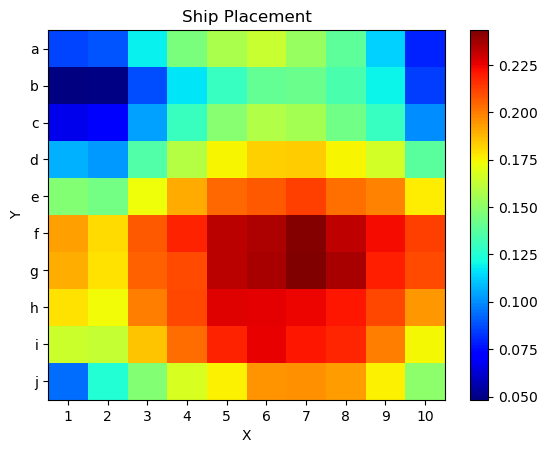

In [23]:
#Heatmap of placements
X, Y = np.meshgrid(np.arange(0, 10, 1), np.arange(0, 10, 1))
distribution_New = distribution / 10000
distribution_2D = distribution_New.reshape(X.shape)
plt.pcolormesh(X, Y, distribution_2D, cmap=plt.cm.jet)
plt.xticks(np.arange(0, 10), np.arange(1, 11))
plt.yticks(np.arange(0, 10), [chr(ord('a') + i) for i in range(9, -1, -1)])  
plt.colorbar()
plt.title('Ship Placement')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()